In [53]:
# Input websites
base_url = 'https://index.minfin.com.ua/ua/russian-invading/casualties/'

In [54]:
# Create a list of months that serves as a url input for websites
import datetime
current_month = datetime.datetime.now().month # a number of passed months

month_list = []
for i in range(2,current_month + 1): # add the current month
        t = datetime.datetime(2022, i, 1, 0, 0)
        t = t.strftime('%Y-%m')
        month_list.append(t)


In [55]:
import requests
import bs4
# Create the ResultSet of the current month
url = base_url + month_list[-1]
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text, 'html.parser')
result_set = soup.find_all("div",{"class":"casualties"})
result_set = result_set[1:]

In [56]:
# Extend the ResultSet with previous months
for month in reversed(month_list[:-1]):
    print(month)
    url = base_url + month
    res = requests.get(base_url + month)
    soup = bs4.BeautifulSoup(res.text, 'html.parser');
    data = soup.find_all("div",{"class":"casualties"})
    len(data[2:])
    result_set.extend(data[1:])


2022-04
2022-03
2022-02


In [57]:
# Columns are sometimes named differently, therefore there is a need to extract unqiue names of columns
columns_name = []
for i in range(len(result_set)):
    children = result_set[i].find_all("li")
    for child in children:
        list = child.getText().split()
        indx = list.index('—')
        #name = []
        #for j in range(indx):
        #    name.append(list[j])
        #    print(name)
        name = " ".join(list[:indx])
        if name not in columns_name:
            columns_name.append(name)
    

In [58]:
len(result_set)

78

In [59]:
print(columns_name)

['Танки', 'ББМ', 'Гармати', 'РСЗВ', 'Засоби ППО', 'Літаки', 'Гелікоптери', 'БПЛА', 'Крилаті ракети', 'Кораблі (катери)', 'Автомобілі та автоцистерни', 'Спеціальна техніка', 'Особовий склад', 'Автомобілі', 'Цистерни з ППМ', 'Пускові установки ОТРК', 'РСЗВ Град', 'ЗРК БУК']


In [60]:
# Create the pandas dataframe with columns extracted from the previous step
# Efficient search

In [61]:
# Update step?

In [62]:
#df = df.append({'A': i}, ignore_index=True)

In [63]:
#  Iterate through ResultSet (or invasion dates) and add data to the empty df one by oe by assigning values to keys in a dictionary
import pandas as pd
df = pd.DataFrame()
for i in range(len(result_set)): 
    children = result_set[i].find_all("li")
    d = {}
    for child in children:
        list = child.getText().split()
        indx = list.index('—')
        name = []
        for j in range(indx):
            name.append(list[j])
        name = " ".join(list[:indx])
        res = [int(ele) for ele in list if ele.isdigit()]
        d[name] = res[0]
    df = df.append(d, ignore_index = True)
        

/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_56207/699910910.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_56207/699910910.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_56207/699910910.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(d, ignore_index = True)
/var/folders/lh/cqpxzpsx44zdjqktqsfb722m0000gn/T/ipykernel_56207/699910910.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Танки                       78 non-null     int64  
 1   ББМ                         78 non-null     int64  
 2   Гармати                     75 non-null     float64
 3   РСЗВ                        71 non-null     float64
 4   Засоби ППО                  73 non-null     float64
 5   Літаки                      78 non-null     int64  
 6   Гелікоптери                 78 non-null     int64  
 7   БПЛА                        75 non-null     float64
 8   Крилаті ракети              12 non-null     float64
 9   Кораблі (катери)            75 non-null     float64
 10  Автомобілі та автоцистерни  12 non-null     float64
 11  Спеціальна техніка          58 non-null     float64
 12  Особовий склад              78 non-null     int64  
 13  Автомобілі                  62 non-nu

In [65]:
# Add date to the dataframe

In [66]:
dates = [
    pd.Timestamp("02.05.2022"),
    pd.Timestamp("02.05.2022"),
    pd.Timestamp("02.05.2022"),
]

In [67]:
# Create the ResultSet of the current month
url = base_url + month_list[-1]
res = requests.get(url)
soup = bs4.BeautifulSoup(res.text, 'html.parser')
result_set = soup.find_all("span",{"class":"black"})
result_set = result_set[1:-1]

# Extend the ResultSet with previous months
for month in reversed(month_list[:-1]):
    print(month)
    url = base_url + month
    res = requests.get(base_url + month)
    soup = bs4.BeautifulSoup(res.text, 'html.parser');
    data = soup.find_all("span",{"class":"black"})
    len(data[2:])
    result_set.extend(data[1:-1])


2022-04
2022-03
2022-02


In [68]:
result_set[2].getText()

'10.05.2022'

In [69]:
#df = pd.DataFrame()
dates_list = []
for i in range(len(result_set)):
    date = result_set[i].getText()
    dates_list.append(pd.Timestamp(day = int(date[0:2]), month = int(date[3:5]), year = int(date[6:])))
#    children = result_set[i].findAll('span', class_='black')
#    d = {}
#    for child in children:
#        print(child)
#        list = child.getText().split()
#        print(list)
#        indx = list.index('—')
#        name = []
#        for j in range(indx):
#            name.append(list[j])
#        name = " ".join(list[:indx])
#        res = [int(ele) for ele in list if ele.isdigit()]
#        d[name] = res[0]
#    df = df.append(d, ignore_index = True)

In [70]:
df['Дата'] = dates_list

In [71]:
import numpy as np
day_index = np.linspace(len(result_set),1,len(result_set))
print(day_index)

[78. 77. 76. 75. 74. 73. 72. 71. 70. 69. 68. 67. 66. 65. 64. 63. 62. 61.
 60. 59. 58. 57. 56. 55. 54. 53. 52. 51. 50. 49. 48. 47. 46. 45. 44. 43.
 42. 41. 40. 39. 38. 37. 36. 35. 34. 33. 32. 31. 30. 29. 28. 27. 26. 25.
 24. 23. 22. 21. 20. 19. 18. 17. 16. 15. 14. 13. 12. 11. 10.  9.  8.  7.
  6.  5.  4.  3.  2.  1.]


In [72]:
df['День'] = day_index

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Танки                       78 non-null     int64         
 1   ББМ                         78 non-null     int64         
 2   Гармати                     75 non-null     float64       
 3   РСЗВ                        71 non-null     float64       
 4   Засоби ППО                  73 non-null     float64       
 5   Літаки                      78 non-null     int64         
 6   Гелікоптери                 78 non-null     int64         
 7   БПЛА                        75 non-null     float64       
 8   Крилаті ракети              12 non-null     float64       
 9   Кораблі (катери)            75 non-null     float64       
 10  Автомобілі та автоцистерни  12 non-null     float64       
 11  Спеціальна техніка          58 non-null     float64       
 

In [74]:
import seaborn as sns 
import matplotlib.pyplot as plt

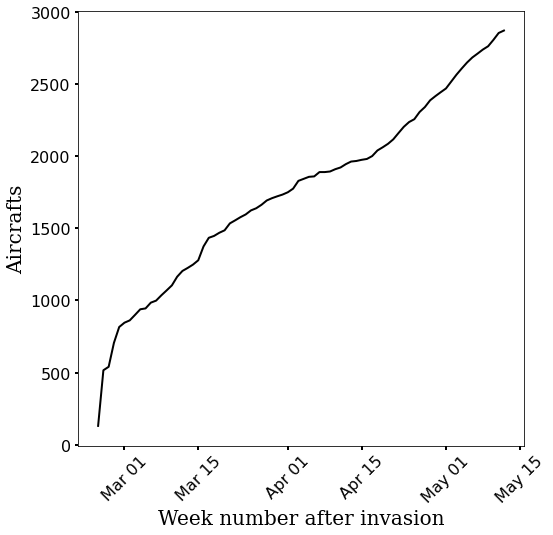

In [75]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="ББМ", linewidth=2,
                data= df, ax=ax, color = 'black')
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')


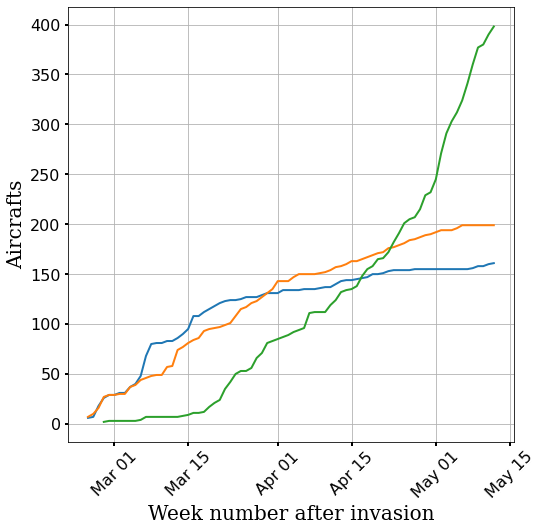

In [76]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="Гелікоптери", linewidth=2,
               data= df, ax=ax)
sns.lineplot(x="Дата", y="Літаки", linewidth=2,
                data= df, ax=ax)
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
sns.lineplot(x="Дата", y="БПЛА", linewidth=2,
                data= df, ax=ax)
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()


In [77]:
df = df.fillna(0)

In [78]:
df['Авто'] = df["Автомобілі"] + df["Автомобілі та автоцистерни"] + df["Цистерни з ППМ"]

In [79]:
df['РСЗВ'] = df['РСЗВ'] + df['РСЗВ Град']

In [80]:
df['Аеро'] = df['Літаки'] + df['БПЛА'] + df['Гелікоптери']

In [81]:
df['Подвіжна Техніка'] = df['Авто'] + df['Танки'] + df['ББМ']

In [82]:
df['Неподвіжна Техніка'] = df['РСЗВ'] + df['Гармати'] + df['Засоби ППО'] + df['Спеціальна техніка']

In [83]:
df = df.replace(0,np.nan)

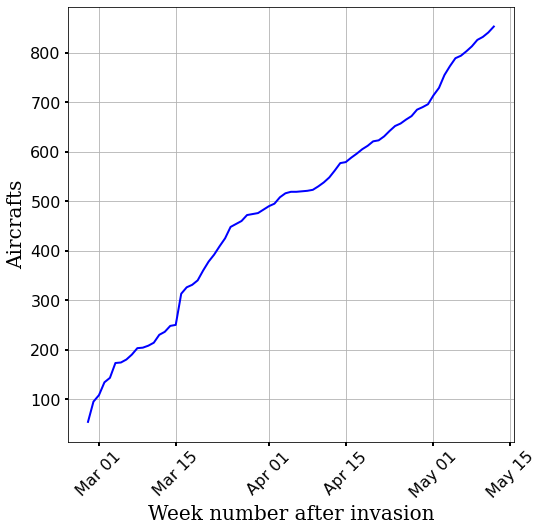

In [84]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
#sns.lineplot(x="Дата", y="РСЗВ Град", linewidth=2,
#               data= df, ax=ax, color = 'black')
sns.lineplot(x="Дата", y="Неподвіжна Техніка", linewidth=2,data= df, ax=ax, color = 'blue')
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
#sns.lineplot(x="Дата", y="Цистерни з ППМ", linewidth=2,
#                data= df, ax=ax, color = 'red')
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()

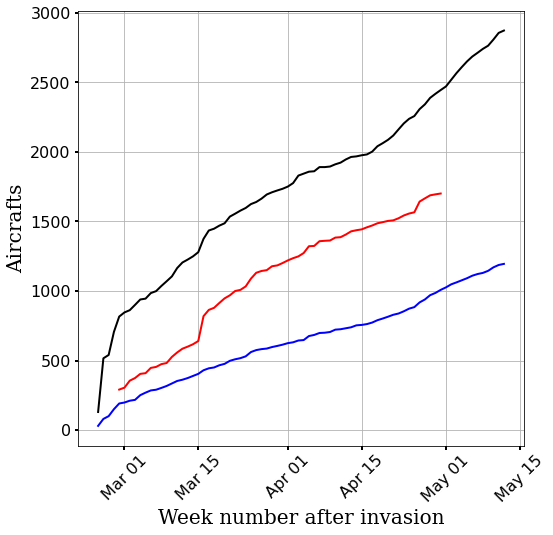

In [85]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="ББМ", linewidth=2,
               data= df, ax=ax, color = 'black')
sns.lineplot(x="Дата", y="Танки", linewidth=2,
                data= df, ax=ax, color = 'blue')
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
sns.lineplot(x="Дата", y="Автомобілі", linewidth=2,
                data= df, ax=ax, color = 'red')
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()

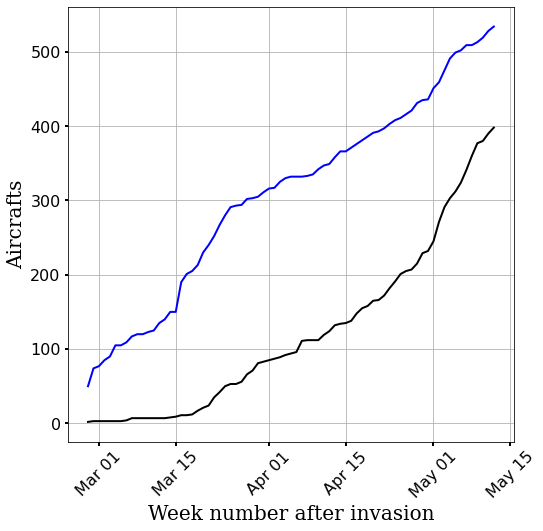

In [86]:
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.lineplot(x="Дата", y="БПЛА", linewidth=2,
               data= df, ax=ax, color = 'black')
sns.lineplot(x="Дата", y="Гармати", linewidth=2,
                data= df, ax=ax, color = 'blue')
#sns.lineplot(x="Дата", y="Гармати", linewidth=2,
#                data= df, ax=ax, color = 'green')
plt.grid()
plt.xlabel("Week number after invasion", fontdict = font2)
plt.ylabel("Aircrafts", fontdict = font2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.xaxis.set_major_formatter(formatter)
ax.tick_params(axis='x', rotation=45,  width=2)
ax.tick_params(axis='y', width=2)
plt.savefig('aircrafts.png')
plt.show()

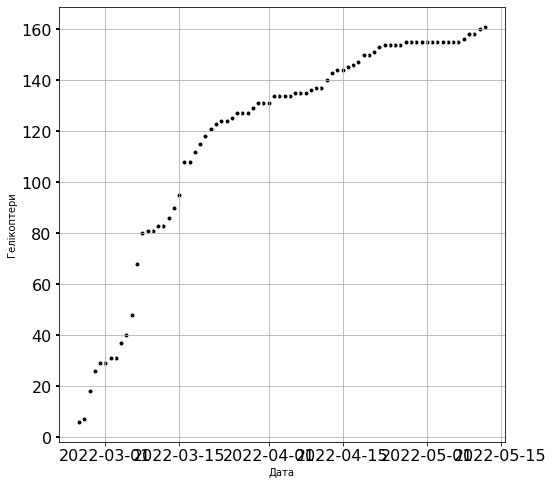

In [87]:
font2 = {'family':'serif','color':'black','size':20}
formatter = mdates.DateFormatter('%b %d')

f, ax = plt.subplots(figsize=(8, 8))
f.patch.set_facecolor('white')
sns.scatterplot(x="Дата", y="Гелікоптери", linewidth=2,
               data= df, ax=ax, color = 'black')
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_facecolor('w')
ax.tick_params(axis='y', width=2)
plt.show()

In [88]:
from datetime import date
d1 = date(2022, 2, 23)
d2 = datetime.date.today()

In [89]:
result = (d2-d1).days//7

In [ ]:
list = []
for i in range(len(df)-7-1,0,-7):
    j = i - 1
    print(j)
    list.append(df['Танки'][j] - df['Танки'][j+7])
x = len(df)//7
i = (len(df) - 7*x - 1)
#list.append((df['Танки'][0] - df['Танки'][i])/i*7)

In [ ]:
array = np.array(list)
rank = array.argsort().argsort()

In [ ]:
font2 = {'family':'serif','color':'black','size':18}
f, ax = plt.subplots(figsize=(9, 8))
sns.set_theme(style="whitegrid")
pal = sns.color_palette("Blues_d", len(list))
ax = sns.barplot(x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], y = list, palette=np.array(pal)[rank])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Week", fontdict = font2)
plt.ylabel("Tanks", fontdict = font2)
plt.savefig('tanks.png')


In [ ]:
rank

In [ ]:
array

In [ ]:
array.argsort()

In [ ]:
array.argsort().argsort()

In [ ]:
array[::-1]

In [ ]:
df['Автомобілі']

In [ ]:
df['Неподвіжна Техніка']

In [ ]:
df.to_pickle("file.pkl")

In [ ]:
import datetime
from os import path
import requests
import bs4
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
formatter = mdates.DateFormatter('%b %d')

class ArmyLoss():
    
    def __init__(self):
        self.df = pd.DataFrame()
        self.base_url = 'https://index.minfin.com.ua/ua/russian-invading/casualties/'
        self.current_month = datetime.datetime.now().month 
        
        if not path.exists("armyloss.pkl"):
            
            self.month_list = []
        
            self._update_month()
               
            self._fill_df()
        
            self._add_dates()
        
            self._pre_process()
            
            self.df.to_pickle("armyloss.pkl")
            
        else:
            
            self.df = pd.read_pickle("armyloss.pkl")
            
        
#        self._generate_resultset_day()
        
    def _update_month(self):
        for i in range(2,self.current_month + 1): # add the current month
            t = datetime.datetime(2022, i, 1, 0, 0)
            t = t.strftime('%Y-%m')
            self.month_list.append(t)
            
    def _generate_resulset_data(self):
        for month in reversed(self.month_list):
            print(month)
            res = requests.get(self.base_url + month)
            soup = bs4.BeautifulSoup(res.text, 'html.parser');
            data = soup.find_all("div",{"class":"casualties"})
            self.result_set.extend(data[1:])
    
    def _fill_df(self):
        self.result_set = []
        self._generate_resulset_data()
        
        for i in reversed(range(len(self.result_set))):
            children = self.result_set[i].find_all("li")
            d = {}
            for child in children:
                list = child.getText().split()
                indx = list.index('—')
                name = []
                for j in range(indx):
                    name.append(list[j])
                name = " ".join(list[:indx])
                res = [int(ele) for ele in list if ele.isdigit()]
                d[name] = res[0]
            self.df = self.df.append(d, ignore_index = True)
    
    
    def _generate_resultset_day(self):
        self.result_set = []
        for month in reversed(self.month_list):
            res = requests.get(self.base_url + month)
            soup = bs4.BeautifulSoup(res.text, 'html.parser')
            data = soup.find_all("span",{"class":"black"})
            self.result_set.extend(data[1:-1])
        
    def _add_dates(self):
        self.result_set = []
        self._generate_resultset_day()
        
        dates_list = []
        for i in reversed(range(len(self.result_set))):
            date = self.result_set[i].getText()
            dates_list.append(pd.Timestamp(day = int(date[0:2]), month = int(date[3:5]), year = int(date[6:]))) 
        
        self.df['Дата'] = dates_list
        
                    
    def _pre_process(self):
        self.df = self.df.fillna(0)
        self.df['Автомобілі'] = self.df["Автомобілі"] + self.df["Автомобілі та автоцистерни"] + self.df["Цистерни з ППМ"]
        self.df['РСЗВ'] = self.df['РСЗВ'] + self.df['РСЗВ Град']
        self.df = self.df.replace(0,np.nan)
        self.df = self.df.drop(columns = ['ЗРК БУК','РСЗВ Град','Автомобілі та автоцистерни','Цистерни з ППМ', 'Пускові установки ОТРК'])
        
        self.df = self.df.rename(columns = {
            'Літаки':'Fighter Aircrafts',
            'Танки':'Tanks',
            'Гелікоптери':'Helicopters',
            'БПЛА':'Unamanned Aircrafts',    
            'РСЗВ':'Multiple Rocket Launcher',
            'ББМ':'Armoured Vehicles',
            'Засоби ППО':'Air Defence Systems',
            'Гармати':'Artillery',
            'Особовий склад':'Manpower',
            'Кораблі (катери)':'Ships and Boats',
            'Крилаті ракети':'Cruise Missiles',
            'Автомобілі': 'Cars and Tank Cars',
            'Спеціальна техніка':'Special Equipment',
            'Дата': 'Date'
        })
        
    def get_columns(self):
        return self.df.columns.values.tolist()
    
    def get_linechart(self, labels):
        font2 = {'family':'serif','color':'black','size':18}
        
        f, ax = plt.subplots(figsize=(8, 8))
        f.patch.set_facecolor('white')
        for item in labels:
            ax.plot(self.df['Date'], self.df[item],label = item)
        plt.grid()
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        ax.xaxis.set_major_formatter(formatter)
        ax.tick_params(axis='x', rotation=45,  width=2)
        ax.legend()
        plt.xlabel("Day",fontdict = font2)
        plt.ylabel("Number", fontdict = font2)
        
        return f

In [ ]:
s = ArmyLoss()

In [ ]:
s.df.info()

In [ ]:
fig = s.get_linechart(['Artillery',"Unamanned Aircrafts", "Cruise Missiles"])